In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist

In [3]:
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)

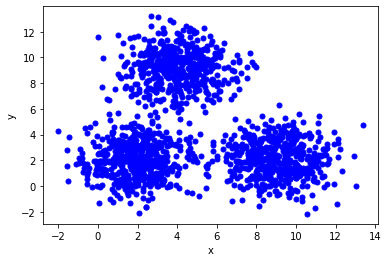

In [4]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

In [5]:
# Khởi tạo tâm cụm
def kmeans_init_centers(X, n_cluster):
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

#Xác định tâm cụm
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  return np.argmin(D, axis = 1)

# Cập nhật lại vị trí của các tâm cụm : lấy trung bình cộng tọa độ của tất cả các điểm dữ liệu của cụm
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    Xk = X[labels == k, :]
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

In [6]:
# Kiểm tra tính hội tụ
def kmeans_has_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [7]:
def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x') # label trục x
  plt.ylabel('y') # label trục y
  plt.title(title) # title của đồ thị
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] 
 
  for i in range(n_cluster):
    data = X[labels == i]
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) # Vẽ cụm i lên đồ thị
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
  plt.legend() 
  plt.show()

In [8]:
def kmeans(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

[[ 3.9737165   8.06340887]
 [ 3.31231703 11.90238891]
 [ 2.49305334  3.57870183]]


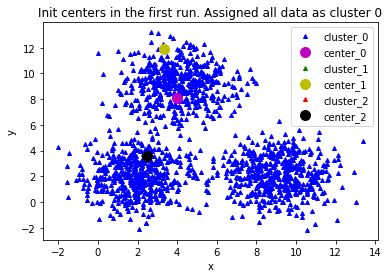

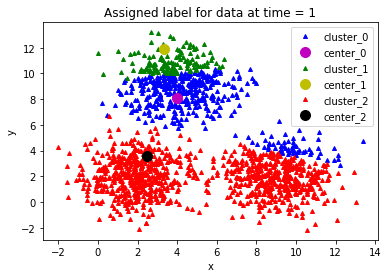

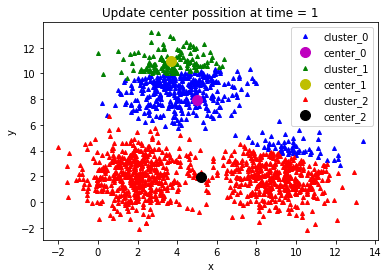

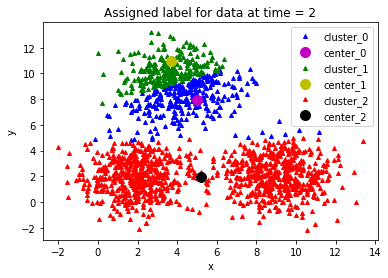

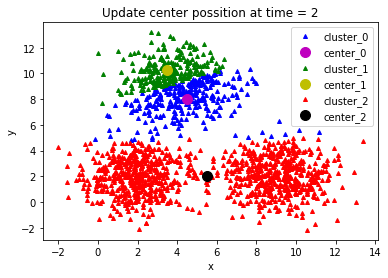

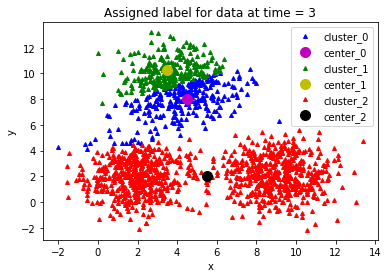

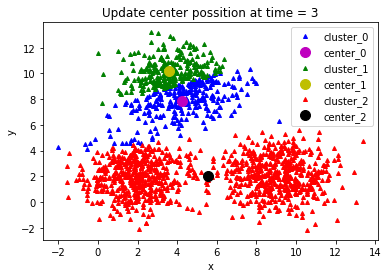

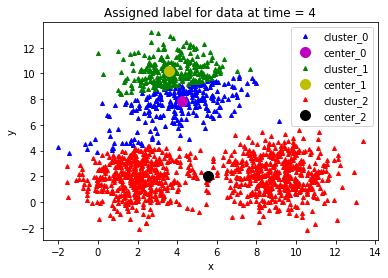

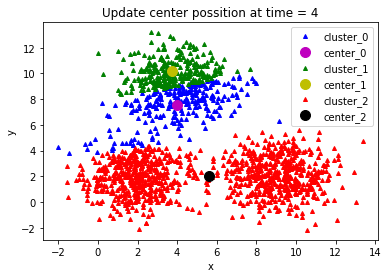

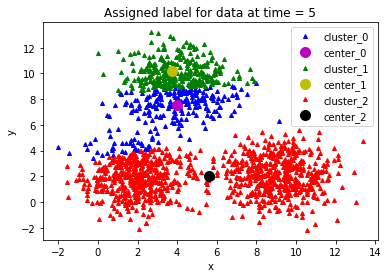

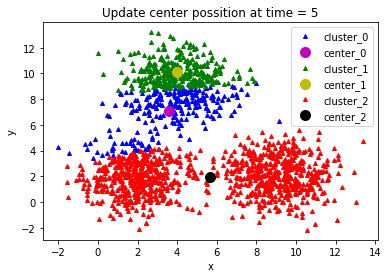

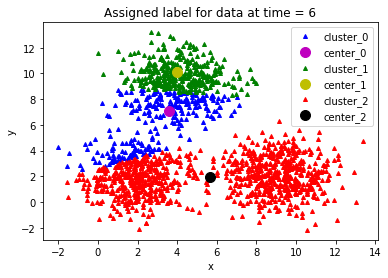

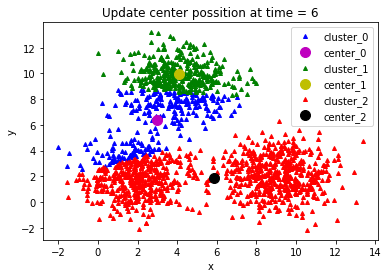

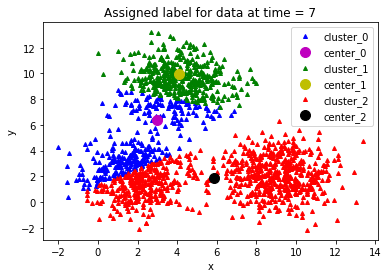

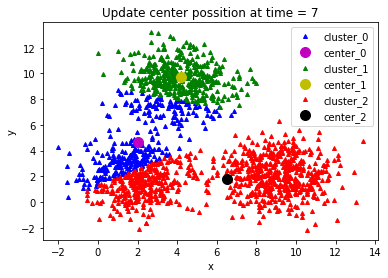

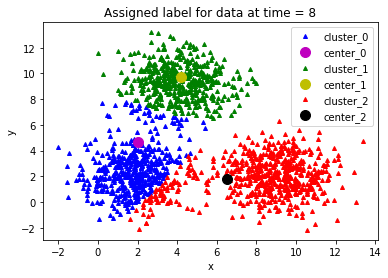

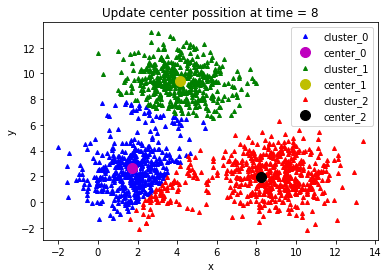

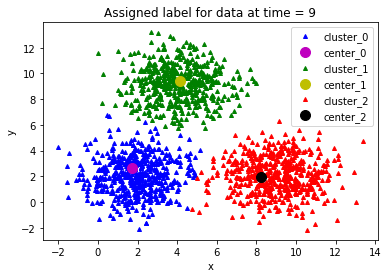

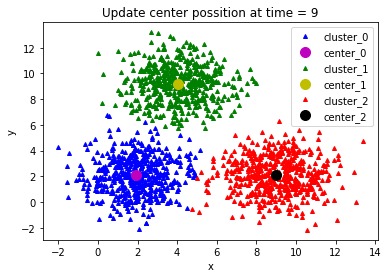

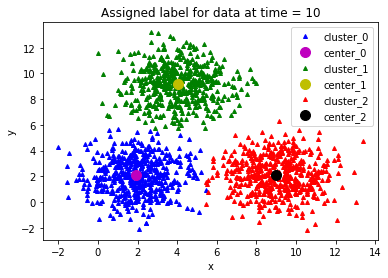

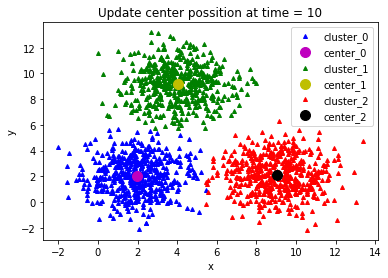

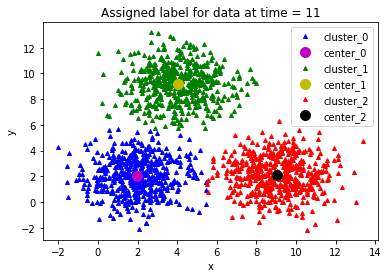

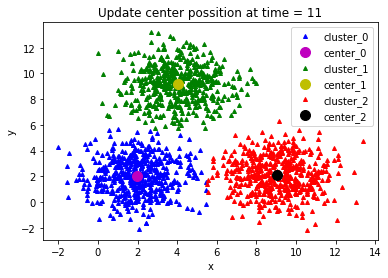

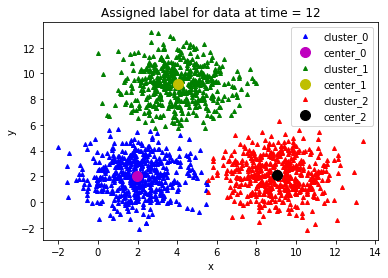

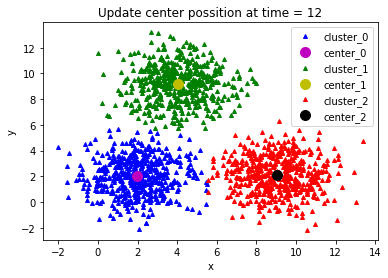

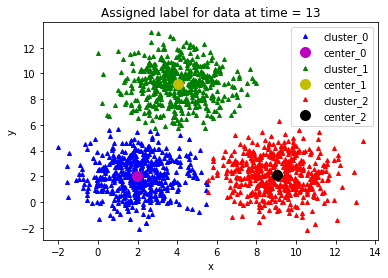

12 times


In [10]:
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)
 
print(times, 'times')